In [1]:
from exps.loaders import Loaders
from exps.mundial_exps import Experimentos
ld=Loaders()
exper=Experimentos()

In [2]:
path = './datain/Proyecto_mundial.xlsx'
df_mundial= ld.cargar_excel(path,'Sheet1')

In [3]:
df_mundial.columns

Index(['KEY', 'MYEAR', 'SIG_SLECCCION', 'PLAYER_NAME', 'COACH.x', 'club_name',
       'player_club_pais', 'Goles Marcados(mundial)', 'Player_Birth',
       'Año de Debut', 'Posicion', 'Partidos Jugados', 'Seleccion',
       'birth_year', 'edad_Player', 'years_expMundial', 'edad_enMundial',
       'tecnico_campeon', 'tecnico_anfitrion', 'Tecnico_outsider',
       'País Anfitrión', 'Campeón', 'Nacionalidad', 'dias_durados', 'COACH.y',
       'equipo_local', 'Era', 'FaseAlcanzada', 'confederacion',
       'etapa_general', 'dummy_goleador', 'dummy_campeon', 'dummy_subcampeon',
       'dummy_semifinalista', 'dummy_eliminados_tempranos', 'dummy_finalistas',
       'player_ones', 'player_anotador', 'categ_posicion', 'edad_categoria',
       'exp_categoria'],
      dtype='object')

# PROBABILIDADES:

## 1. EMPIRICA / FRECUENTISTA

In [4]:
p_campeon= exper.probabilidad_binaria_empirica(df_mundial,'dummy_campeon')
p_finalistas= exper.probabilidad_binaria_empirica(df_mundial,'dummy_finalistas')
p_semi_finalistas= exper.probabilidad_binaria_empirica(df_mundial,'dummy_semifinalista')
p_perder= exper.probabilidad_binaria_empirica(df_mundial,'dummy_eliminados_tempranos')

In [5]:
print(f"P_Campeon: {p_campeon}")
print(f"P_finalista: {p_finalistas}")
print(f"semi_finalistas: {p_semi_finalistas}")
print(f"P_perder: {p_perder}")

P_Campeon: 0.0475473321858864
P_finalista: 0.09487951807228916
semi_finalistas: 0.09369621342512909
P_perder: 0.8114242685025818


## 2. CONJUNTA

### 2.1. SINGLE

#### La probabilidad de que un jugador sea campeon por pais

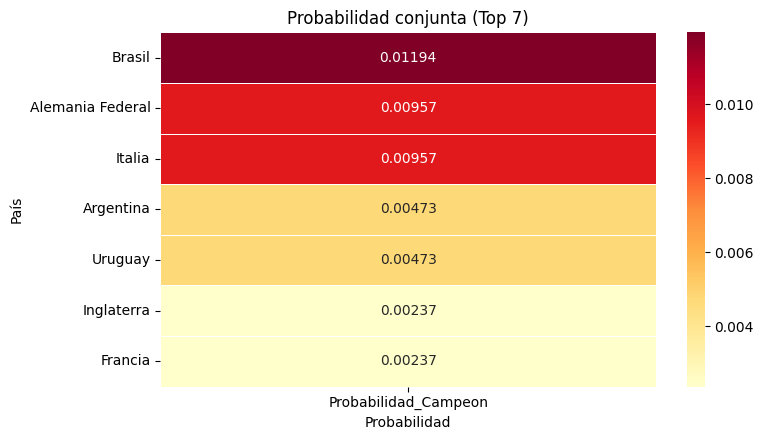

In [6]:
select_champ= exper.tabla_probabilidad_conjunta(df_mundial,'Seleccion','dummy_campeon')
exper.grap_contingencia(select_champ,top=7)


In [7]:
select_champ

dummy_campeon,0,1
Seleccion,,
Alemania Federal,0.033348,0.009574
Alemania Oriental,0.002367,0.000000
Angola,0.002582,0.000000
Arabia Saudita,0.009574,0.000000
Argelia,0.009682,0.000000
...,...,...
Ucrania,0.002474,0.000000
Unión Soviética,0.016566,0.000000
Uruguay,0.023989,0.004733


#### La probabilidad de que un jugador sea perdedor por pais

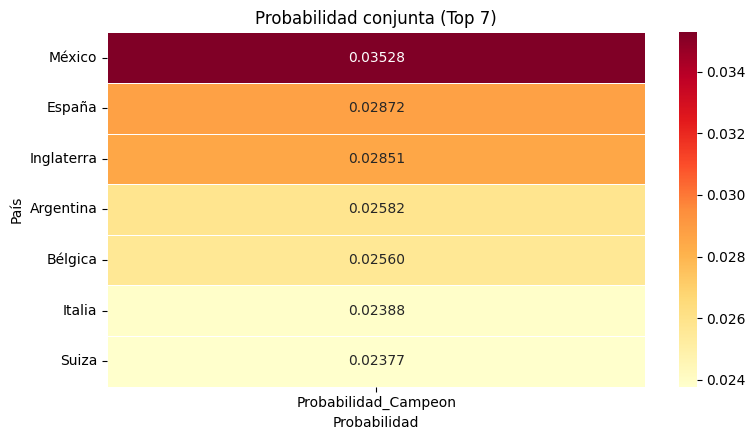

In [8]:
select_losers= exper.tabla_probabilidad_conjunta(df_mundial,'Seleccion','dummy_eliminados_tempranos')
exper.grap_contingencia(select_losers,top=7)


#### La probabilidad de que un jugador sea ganador por edad

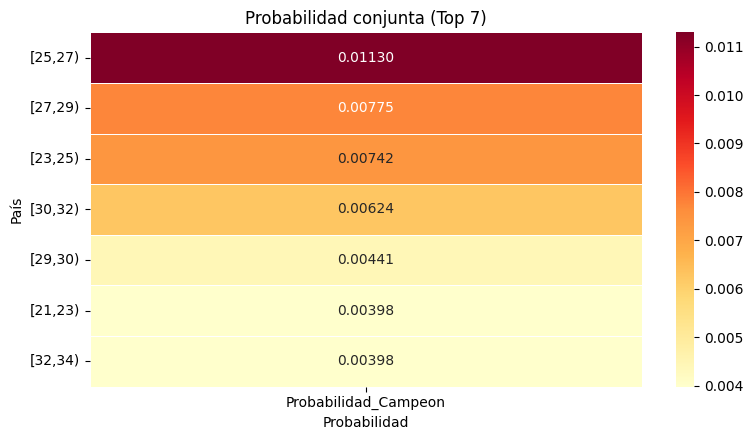

In [9]:
select_age_champs= exper.tabla_probabilidad_conjunta(df_mundial,'edad_categoria','dummy_campeon')
exper.grap_contingencia(select_age_champs,top=7)

#### La probabilidad de que un jugador sea perdedor por edad

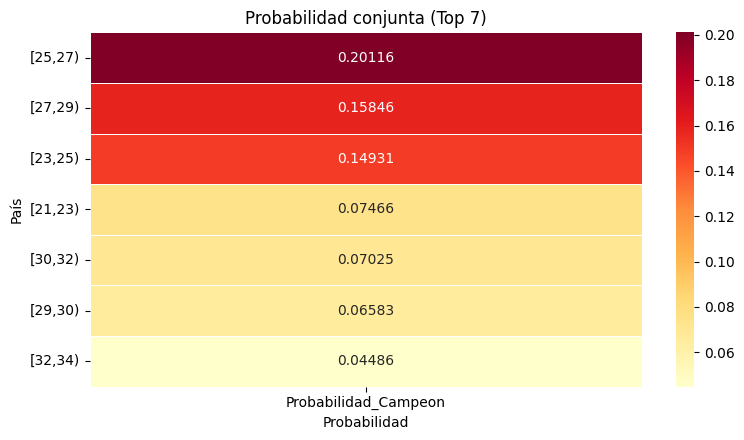

In [10]:
select_age_losers= exper.tabla_probabilidad_conjunta(df_mundial,'edad_categoria','dummy_eliminados_tempranos')
exper.grap_contingencia(select_age_losers,top=7)

#### La probabilidad de que un jugador sea ganador por Confederacion

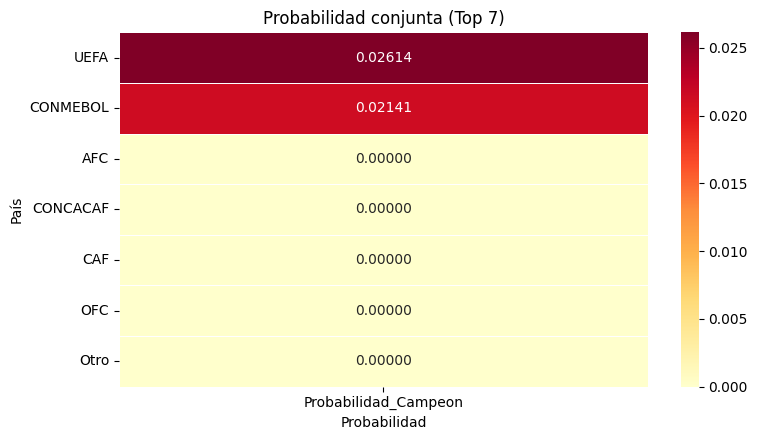

In [11]:
select_conf_champs= exper.tabla_probabilidad_conjunta(df_mundial,'confederacion','dummy_campeon')
exper.grap_contingencia(select_conf_champs,top=7)


#### La probabilidad de que un jugador sea perdedor por Confederacion

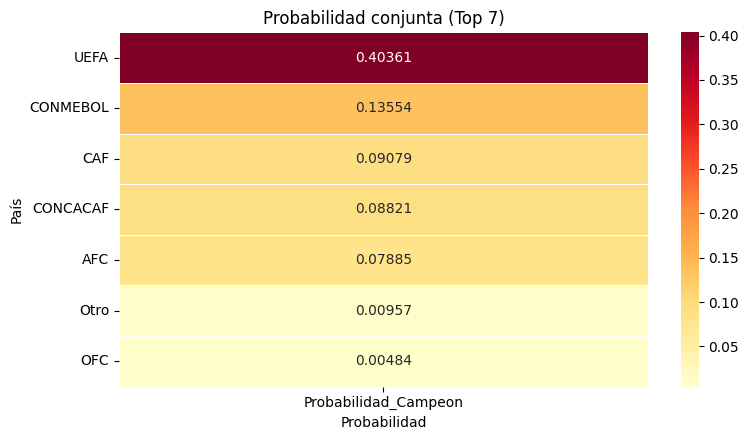

In [12]:
select_conf_losers= exper.tabla_probabilidad_conjunta(df_mundial,'confederacion','dummy_eliminados_tempranos')
exper.grap_contingencia(select_conf_losers,top=7)

### 2.2. MULTIPLE

#### La probabilidad de que un jugador sea ganador por seleccion y edad

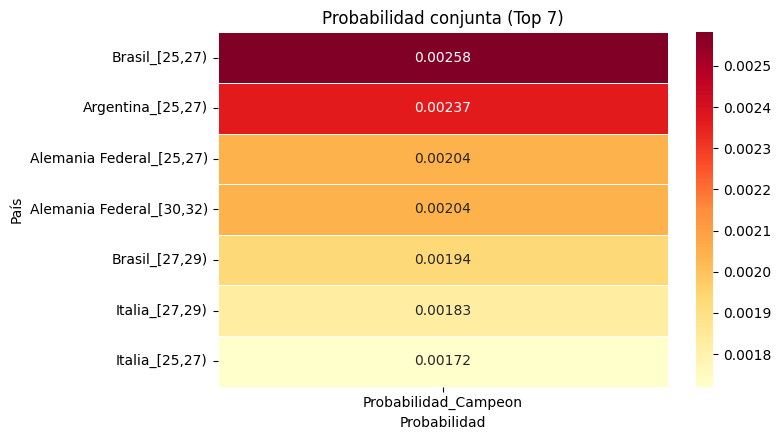

In [13]:
select_SELECCION_EDAD_champs= exper.tabla_probabilidad_conjunta(df_mundial,['Seleccion','edad_categoria'],'dummy_campeon')
exper.grap_contingencia(select_SELECCION_EDAD_champs, top=7)

#### La probabilidad de que un jugador sea perdedor por seleccion y edad

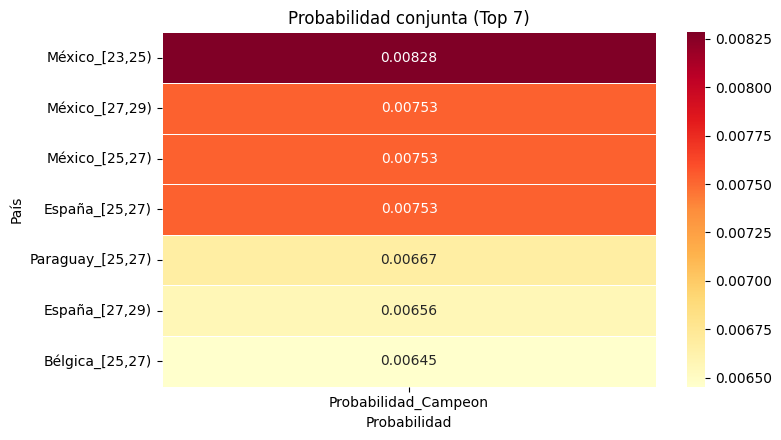

In [14]:
select_SELECCION_EDAD_losers= exper.tabla_probabilidad_conjunta(df_mundial,['Seleccion','edad_categoria'],'dummy_eliminados_tempranos')
exper.grap_contingencia(select_SELECCION_EDAD_losers, top=7)


## 3. MARGINAL

In [15]:
import pandas as pd

def agregar_marginales(tabla_conjunta):
    """
    Recibe una tabla de probabilidad conjunta (normalizada con `normalize='all'`) y 
    le agrega las probabilidades marginales por fila y por columna.

    Args:
        tabla_conjunta (pd.DataFrame): Tabla con columnas binarias (ej. 0, 1)

    Returns:
        pd.DataFrame: Tabla extendida con marginales de fila y columna.
    """
    # Verifica que las columnas sean 0 y 1
    if set(tabla_conjunta.columns) != {0, 1}:
        raise ValueError("La tabla debe tener exactamente las columnas 0 y 1 como variables binarias.")
    
    # Copiar tabla original
    tabla = tabla_conjunta.copy()

    # Marginal por fila (sumar las conjuntas por cada categoría de fila)
    tabla['Marginal_fila'] = tabla.sum(axis=1)

    # Marginal por columna (sumar todos los valores por evento)
    marginal_col = tabla.sum(axis=0)
    marginal_col['Marginal_fila'] = marginal_col.sum()  # Total = 1.0

    # Agregar la fila final
    tabla.loc['Marginal_col'] = marginal_col

    return tabla


In [16]:
tabla_conjunta = pd.crosstab(df_mundial['Seleccion'], df_mundial['dummy_campeon'], normalize='all')
tabla_completa = agregar_marginales(tabla_conjunta)

print(tabla_completa)


dummy_campeon             0         1  Marginal_fila
Seleccion                                           
Alemania Federal   0.033348  0.009574       0.042922
Alemania Oriental  0.002367  0.000000       0.002367
Angola             0.002582  0.000000       0.002582
Arabia Saudita     0.009574  0.000000       0.009574
Argelia            0.009682  0.000000       0.009682
...                     ...       ...            ...
Unión Soviética    0.016566  0.000000       0.016566
Uruguay            0.023989  0.004733       0.028722
Yugoslavia         0.020762  0.000000       0.020762
Zaire              0.002367  0.000000       0.002367
Marginal_col       0.952453  0.047547       2.000000

[81 rows x 3 columns]


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency  # IMPORTANTE

class AnalizadorIndependencia:
    """
    Clase para analizar independencia entre eventos usando probabilidades
    marginales, conjuntas y condicionales
    """

    def crear_tabla_completa_probabilidades(self, df, var1, var2):
        tabla_conjunta = pd.crosstab(df[var1], df[var2], normalize='all')
        tabla_completa = self.agregar_marginales(tabla_conjunta)
        return tabla_completa

    def agregar_marginales(self, tabla_conjunta):
        if set(tabla_conjunta.columns).issubset({0, 1}) == False:
            raise ValueError("La tabla debe tener columnas binarias: 0 y 1")
        
        tabla = tabla_conjunta.copy()
        tabla['Marginal_fila'] = tabla.sum(axis=1)
        marginal_col = tabla.sum(axis=0)
        marginal_col['Marginal_fila'] = marginal_col.sum()
        tabla.loc['Marginal_col'] = marginal_col
        return tabla

    def analizar_independencia_completo(self, df, var1, var2, mostrar_detalles=True):
        print(f"\n{'='*60}")
        print(f"ANÁLISIS DE INDEPENDENCIA: {var1} vs {var2}")
        print(f"{'='*60}")

        tabla_completa = self.crear_tabla_completa_probabilidades(df, var1, var2)

        if mostrar_detalles:
            print("\n1. TABLA DE PROBABILIDADES CONJUNTAS Y MARGINALES:")
            print(tabla_completa.round(4))

        P_A1 = tabla_completa.loc['Marginal_col', 1]
        P_A0 = tabla_completa.loc['Marginal_col', 0]

        probabilidades_conjuntas = {}
        probabilidades_condicionales = {}

        for categoria in tabla_completa.index[:-1]:  # Excluye Marginal_col
            P_B = tabla_completa.loc[categoria, 'Marginal_fila']
            P_AB1 = tabla_completa.loc[categoria, 1]
            P_AB0 = tabla_completa.loc[categoria, 0]

            probabilidades_conjuntas[categoria] = {
                'P_B': P_B,
                'P_AB1': P_AB1,
                'P_AB0': P_AB0
            }

            P_A1_dado_B = P_AB1 / P_B if P_B > 0 else 0
            P_A0_dado_B = P_AB0 / P_B if P_B > 0 else 0

            probabilidades_condicionales[categoria] = {
                'P_A1_dado_B': P_A1_dado_B,
                'P_A0_dado_B': P_A0_dado_B
            }

        print(f"\n2. PROBABILIDADES MARGINALES:")
        print(f"P(evento = 1) = {P_A1:.4f}")
        print(f"P(evento = 0) = {P_A0:.4f}")

        print(f"\n3. ANÁLISIS POR CATEGORÍA:")
        resultados_independencia = {}

        for categoria in probabilidades_conjuntas:
            print(f"\n--- {categoria} ---")
            P_B = probabilidades_conjuntas[categoria]['P_B']
            P_AB1 = probabilidades_conjuntas[categoria]['P_AB1']
            P_A1_dado_B = probabilidades_condicionales[categoria]['P_A1_dado_B']
            P_AB1_esperada = P_A1 * P_B
            diferencia = P_AB1 - P_AB1_esperada
            es_independiente = abs(diferencia) < 0.001

            print(f"P({categoria}) = {P_B:.4f}")
            print(f"P(evento=1 ∩ {categoria}) = {P_AB1:.4f}")
            print(f"P(evento=1 | {categoria}) = {P_A1_dado_B:.4f}")
            print(f"P(evento=1) × P({categoria}) = {P_AB1_esperada:.4f}")
            print(f"Diferencia: {diferencia:.4f}")
            print(f"¿Independiente?: {'SÍ' if es_independiente else 'NO'}")

            if not es_independiente:
                print(f"→ {categoria} {'AUMENTA' if diferencia > 0 else 'DISMINUYE'} la probabilidad del evento")

            resultados_independencia[categoria] = {
                'es_independiente': es_independiente,
                'diferencia': diferencia,
                'P_condicional': P_A1_dado_B,
                'P_marginal': P_A1
            }

        print(f"\n4. RESUMEN DE INDEPENDENCIA:")
        independientes = sum(1 for r in resultados_independencia.values() if r['es_independiente'])
        total = len(resultados_independencia)
        print(f"Categorías independientes: {independientes}/{total}")

        if independientes == total:
            print("✅ TODAS las categorías son independientes del evento")
        else:
            print("❌ Existen dependencias entre categorías y el evento")
            dependencias = [(cat, abs(res['diferencia']))
                            for cat, res in resultados_independencia.items()
                            if not res['es_independiente']]
            dependencias.sort(key=lambda x: x[1], reverse=True)
            print("\nCategorías con mayor dependencia:")
            for cat, diff in dependencias[:3]:
                direccion = "positiva" if resultados_independencia[cat]['diferencia'] > 0 else "negativa"
                print(f"- {cat}: {diff:.4f} (dependencia {direccion})")

        tabla_contingencia = pd.crosstab(df[var1], df[var2])
        chi2, p_valor, dof, expected = chi2_contingency(tabla_contingencia)

        print(f"\n5. TEST CHI-CUADRADO DE INDEPENDENCIA:")
        print(f"Estadístico Chi²: {chi2:.4f}")
        print(f"P-valor: {p_valor:.4f}")
        print(f"Grados de libertad: {dof}")
        if p_valor < 0.05:
            print("❌ Se RECHAZA H₀: Las variables NO son independientes (p < 0.05)")
        else:
            print("✅ No se rechaza H₀: Las variables podrían ser independientes (p ≥ 0.05)")

        return {
            'tabla_completa': tabla_completa,
            'resultados_independencia': resultados_independencia,
            'chi2_test': {'chi2': chi2, 'p_valor': p_valor, 'dof': dof}
        }

In [21]:
analizador = AnalizadorIndependencia()
resultado = analizador.analizar_independencia_completo(df_mundial, 'confederacion', 'dummy_campeon')



ANÁLISIS DE INDEPENDENCIA: confederacion vs dummy_campeon

1. TABLA DE PROBABILIDADES CONJUNTAS Y MARGINALES:
dummy_campeon       0       1  Marginal_fila
confederacion                               
AFC            0.0813  0.0000         0.0813
CAF            0.0908  0.0000         0.0908
CONCACAF       0.0899  0.0000         0.0899
CONMEBOL       0.1667  0.0214         0.1881
OFC            0.0048  0.0000         0.0048
Otro           0.0096  0.0000         0.0096
UEFA           0.5093  0.0261         0.5354
Marginal_col   0.9525  0.0475         2.0000

2. PROBABILIDADES MARGINALES:
P(evento = 1) = 0.0475
P(evento = 0) = 0.9525

3. ANÁLISIS POR CATEGORÍA:

--- AFC ---
P(AFC) = 0.0813
P(evento=1 ∩ AFC) = 0.0000
P(evento=1 | AFC) = 0.0000
P(evento=1) × P(AFC) = 0.0039
Diferencia: -0.0039
¿Independiente?: NO
→ AFC DISMINUYE la probabilidad del evento

--- CAF ---
P(CAF) = 0.0908
P(evento=1 ∩ CAF) = 0.0000
P(evento=1 | CAF) = 0.0000
P(evento=1) × P(CAF) = 0.0043
Diferencia: -0.0043
¿Inde

In [17]:
import numpy as np

seleccion = 'Argentina'

P_AyB = tabla_conjunta.loc[seleccion, 1]  # P(Argentina ∩ Campeón)
P_A = tabla_completa.loc[seleccion, 'Marginal_fila']
P_B = tabla_completa.loc['Marginal_col', 1]

P_A_dado_B = P_AyB / P_B
P_B_dado_A = P_AyB / P_A
P_AxB = P_A * P_B

print(f"P({seleccion} ∩ Campeón) = {P_AyB:.4f}")
print(f"P({seleccion}) = {P_A:.4f}")
print(f"P(Campeón) = {P_B:.4f}")
print(f"P({seleccion} | Campeón) = {P_A_dado_B:.4f}")
print(f"P(Campeón | {seleccion}) = {P_B_dado_A:.4f}")
print(f"P({seleccion}) * P(Campeón) = {P_AxB:.4f}")

if np.isclose(P_AyB, P_AxB):
    print("✅ Los eventos son independientes.")
else:
    print("❌ Los eventos no son independientes.")

P(Argentina ∩ Campeón) = 0.0047
P(Argentina) = 0.0379
P(Campeón) = 0.0475
P(Argentina | Campeón) = 0.0995
P(Campeón | Argentina) = 0.1250
P(Argentina) * P(Campeón) = 0.0018
❌ Los eventos no son independientes.


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

class AnalizadorIndependencia:
    """
    Clase para analizar independencia entre eventos usando probabilidades
    marginales, conjuntas y condicionales
    """
    
    def __init__(self):
        pass
    
    def crear_tabla_completa_probabilidades(self, df, var1, var2):
        """
        Crea tabla de probabilidades conjuntas con marginales
        """
        # Tabla de contingencia con probabilidades conjuntas
        tabla_conjunta = pd.crosstab(df[var1], df[var2], normalize='all')
        
        # Agregar marginales
        tabla_completa = self.agregar_marginales(tabla_conjunta)
        
        return tabla_completa
    
    def agregar_marginales(self, tabla_conjunta):
        """
        Agrega probabilidades marginales a tabla conjunta
        """
        if set(tabla_conjunta.columns) != {0, 1}:
            raise ValueError("La tabla debe tener exactamente las columnas 0 y 1")
        
        tabla = tabla_conjunta.copy()
        
        # Marginal por fila
        tabla['Marginal_fila'] = tabla.sum(axis=1)
        
        # Marginal por columna
        marginal_col = tabla.sum(axis=0)
        marginal_col['Marginal_fila'] = marginal_col.sum()
        
        # Agregar fila de marginales de columna
        tabla.loc['Marginal_col'] = marginal_col
        
        return tabla
    
    def analizar_independencia_completo(self, df, var1, var2, mostrar_detalles=True):
        """
        Análisis completo de independencia entre dos variables binarias
        """
        print(f"\n{'='*60}")
        print(f"ANÁLISIS DE INDEPENDENCIA: {var1} vs {var2}")
        print(f"{'='*60}")
        
        # 1. Crear tabla de probabilidades
        tabla_completa = self.crear_tabla_completa_probabilidades(df, var1, var2)
        
        if mostrar_detalles:
            print("\n1. TABLA DE PROBABILIDADES CONJUNTAS Y MARGINALES:")
            print(tabla_completa.round(4))
        
        # 2. Extraer probabilidades clave
        # Probabilidades marginales
        P_A1 = tabla_completa.loc['Marginal_col', 1]  # P(evento = 1)
        P_A0 = tabla_completa.loc['Marginal_col', 0]  # P(evento = 0)
        
        # Probabilidades conjuntas
        probabilidades_conjuntas = {}
        probabilidades_condicionales = {}
        
        for categoria in tabla_completa.index[:-1]:  # Excluir 'Marginal_col'
            P_B = tabla_completa.loc[categoria, 'Marginal_fila']  # P(categoria)
            P_AB1 = tabla_completa.loc[categoria, 1]  # P(categoria ∩ evento=1)
            P_AB0 = tabla_completa.loc[categoria, 0]  # P(categoria ∩ evento=0)
            
            probabilidades_conjuntas[categoria] = {
                'P_B': P_B,
                'P_AB1': P_AB1,
                'P_AB0': P_AB0
            }
            
            # Probabilidades condicionales
            P_A1_dado_B = P_AB1 / P_B if P_B > 0 else 0
            P_A0_dado_B = P_AB0 / P_B if P_B > 0 else 0
            
            probabilidades_condicionales[categoria] = {
                'P_A1_dado_B': P_A1_dado_B,
                'P_A0_dado_B': P_A0_dado_B
            }
        
        # 3. Análisis de independencia
        print(f"\n2. PROBABILIDADES MARGINALES:")
        print(f"P(evento = 1) = {P_A1:.4f}")
        print(f"P(evento = 0) = {P_A0:.4f}")
        
        print(f"\n3. ANÁLISIS POR CATEGORÍA:")
        resultados_independencia = {}
        
        for categoria in probabilidades_conjuntas.keys():
            print(f"\n--- {categoria} ---")
            
            P_B = probabilidades_conjuntas[categoria]['P_B']
            P_AB1 = probabilidades_conjuntas[categoria]['P_AB1']
            P_A1_dado_B = probabilidades_condicionales[categoria]['P_A1_dado_B']
            
            # Probabilidad esperada bajo independencia
            P_AB1_esperada = P_A1 * P_B
            
            # Test de independencia
            es_independiente = abs(P_AB1 - P_AB1_esperada) < 0.001
            diferencia = P_AB1 - P_AB1_esperada
            
            print(f"P({categoria}) = {P_B:.4f}")
            print(f"P(evento=1 ∩ {categoria}) = {P_AB1:.4f}")
            print(f"P(evento=1 | {categoria}) = {P_A1_dado_B:.4f}")
            print(f"P(evento=1) × P({categoria}) = {P_AB1_esperada:.4f}")
            print(f"Diferencia: {diferencia:.4f}")
            print(f"¿Independiente?: {'SÍ' if es_independiente else 'NO'}")
            
            if not es_independiente:
                if diferencia > 0:
                    print(f"→ {categoria} AUMENTA la probabilidad del evento")
                else:
                    print(f"→ {categoria} DISMINUYE la probabilidad del evento")
            
            resultados_independencia[categoria] = {
                'es_independiente': es_independiente,
                'diferencia': diferencia,
                'P_condicional': P_A1_dado_B,
                'P_marginal': P_A1
            }
        
        # 4. Resumen general
        print(f"\n4. RESUMEN DE INDEPENDENCIA:")
        independientes = sum(1 for r in resultados_independencia.values() if r['es_independiente'])
        total = len(resultados_independencia)
        
        print(f"Categorías independientes: {independientes}/{total}")
        
        if independientes == total:
            print("✅ TODAS las categorías son independientes del evento")
        else:
            print("❌ Existen dependencias entre categorías y el evento")
            
            # Mostrar las más dependientes
            dependencias = [(cat, abs(res['diferencia'])) 
                          for cat, res in resultados_independencia.items() 
                          if not res['es_independiente']]
            dependencias.sort(key=lambda x: x[1], reverse=True)
            
            print("\nCategorías con mayor dependencia:")
            for cat, diff in dependencias[:3]:
                direccion = "positiva" if resultados_independencia[cat]['diferencia'] > 0 else "negativa"
                print(f"- {cat}: {diff:.4f} (dependencia {direccion})")
        
        # 5. Test Chi-cuadrado
        tabla_contingencia = pd.crosstab(df[var1], df[var2])
        chi2, p_valor, dof, expected = chi2_contingency(tabla_contingencia)
        
        print(f"\n5. TEST CHI-CUADRADO DE INDEPENDENCIA:")
        print(f"Estadístico Chi²: {chi2:.4f}")
        print(f"P-valor: {p_valor:.4f}")
        print(f"Grados de libertad: {dof}")
        
        if p_valor < 0.05:
            print("❌ Se RECHAZA H₀: Las variables NO son independientes (p < 0.05)")
        else:
            print("✅ No se rechaza H₀: Las variables podrían ser independientes (p ≥ 0.05)")
        
        return {
            'tabla_completa': tabla_completa,
            'resultados_independencia': resultados_independencia,
            'chi2_test': {'chi2': chi2, 'p_valor': p_valor, 'dof': dof}
        }

# Función para análisis múltiple
def analizar_multiples_variables(df, lista_variables, variable_objetivo):
    """
    Analiza independencia de múltiples variables con respecto a una variable objetivo
    """
    analizador = AnalizadorIndependencia()
    
    resultados = {}
    
    for var in lista_variables:
        print(f"\n{'#'*80}")
        resultado = analizador.analizar_independencia_completo(df, var, variable_objetivo)
        resultados[var] = resultado
    
    return resultados

# IMPLEMENTACIÓN CON TUS DATOS EXISTENTES
# Integrar después de tu código actual

# Crear instancia del analizador
analizador = AnalizadorIndependencia()

print("\n" + "="*80)
print("ANÁLISIS COMPLETO DE INDEPENDENCIA - DATOS MUNDIALES")
print("="*80)

# 1. Análisis con las variables que ya tienes
variables_analizar = [
    'Seleccion',
    'edad_categoria', 
    'confederacion'
]

# 2. Análisis para cada evento (campeón, finalista, etc.)
eventos_analizar = [
    'dummy_campeon',
    'dummy_finalistas', 
    'dummy_semifinalista',
    'dummy_eliminados_tempranos'
]

# 3. Análisis detallado por cada combinación
resultados_completos = {}

for evento in eventos_analizar:
    print(f"\n{'*'*60}")
    print(f"ANÁLISIS PARA: {evento.upper()}")
    print(f"{'*'*60}")
    
    resultados_completos[evento] = {}
    
    for var in variables_analizar:
        resultado = analizador.analizar_independencia_completo(
            df_mundial, var, evento, mostrar_detalles=True
        )
        resultados_completos[evento][var] = resultado

# 4. Resumen ejecutivo
print(f"\n{'#'*80}")
print("RESUMEN EJECUTIVO - INDEPENDENCIA")
print(f"{'#'*80}")

for evento in eventos_analizar:
    print(f"\n--- {evento.upper()} ---")
    for var in variables_analizar:
        chi2_p = resultados_completos[evento][var]['chi2_test']['p_valor']
        independientes = sum(1 for r in resultados_completos[evento][var]['resultados_independencia'].values() 
                           if r['es_independiente'])
        total = len(resultados_completos[evento][var]['resultados_independencia'])
        
        status = "INDEPENDIENTE" if chi2_p >= 0.05 else "DEPENDIENTE"
        print(f"{var}: {status} (p-valor: {chi2_p:.4f}, {independientes}/{total} categorías independientes)")

# 5. Análisis específico usando tu tabla existente
print(f"\n{'='*60}")
print("ANÁLISIS DETALLADO - SELECCIÓN vs CAMPEÓN (TU TABLA)")
print(f"{'='*60}")

# Usar tu tabla existente
tabla_completa_seleccion = agregar_marginales(tabla_conjunta)
print("Tabla con marginales:")
print(tabla_completa_seleccion.round(4))

# Análisis manual de independencia
P_campeon = tabla_completa_seleccion.loc['Marginal_col', 1]
print(f"\nP(Campeón) = {P_campeon:.4f}")

print("\nAnálisis por selección:")
for seleccion in tabla_completa_seleccion.index[:-1]:
    P_seleccion = tabla_completa_seleccion.loc[seleccion, 'Marginal_fila']
    P_seleccion_y_campeon = tabla_completa_seleccion.loc[seleccion, 1]
    P_campeon_dado_seleccion = P_seleccion_y_campeon / P_seleccion if P_seleccion > 0 else 0
    
    # Test de independencia
    P_esperada = P_campeon * P_seleccion
    diferencia = P_seleccion_y_campeon - P_esperada
    
    print(f"\n{seleccion}:")
    print(f"  P({seleccion}) = {P_seleccion:.4f}")
    print(f"  P(Campeón | {seleccion}) = {P_campeon_dado_seleccion:.4f}")
    print(f"  P(Campeón ∩ {seleccion}) = {P_seleccion_y_campeon:.4f}")
    print(f"  P(Campeón) × P({seleccion}) = {P_esperada:.4f}")
    print(f"  Diferencia = {diferencia:.4f}")
    
    if abs(diferencia) < 0.001:
        print(f"  ✅ INDEPENDIENTE")
    else:
        efecto = "aumenta" if diferencia > 0 else "disminuye"
        print(f"  ❌ DEPENDIENTE - {seleccion} {efecto} la probabilidad de ser campeón")



ANÁLISIS COMPLETO DE INDEPENDENCIA - DATOS MUNDIALES

************************************************************
ANÁLISIS PARA: DUMMY_CAMPEON
************************************************************

ANÁLISIS DE INDEPENDENCIA: Seleccion vs dummy_campeon

1. TABLA DE PROBABILIDADES CONJUNTAS Y MARGINALES:
dummy_campeon           0       1  Marginal_fila
Seleccion                                       
Alemania Federal   0.0333  0.0096         0.0429
Alemania Oriental  0.0024  0.0000         0.0024
Angola             0.0026  0.0000         0.0026
Arabia Saudita     0.0096  0.0000         0.0096
Argelia            0.0097  0.0000         0.0097
...                   ...     ...            ...
Unión Soviética    0.0166  0.0000         0.0166
Uruguay            0.0240  0.0047         0.0287
Yugoslavia         0.0208  0.0000         0.0208
Zaire              0.0024  0.0000         0.0024
Marginal_col       0.9525  0.0475         2.0000

[81 rows x 3 columns]

2. PROBABILIDADES MARGINAL